# Performance Metrics

### Review of model validation
+ Cross validate a decision tree model
+ train_test_split, score model with train data, score model with test data.

### Performance metrics
+ accuracy, p vs n, tp, fp, tn, fn
+ balanced accuracy
+ precision, recall


### Datasets

In [1]:
import pandas
iris = pandas.read_csv('../Datasets/iris50.csv')
admission = pandas.read_csv('../Datasets/admission.csv')
cancer = pandas.read_csv('../Datasets/breast-cancer-wisconsin.csv')
diabetes = pandas.read_csv('../Datasets/diabetes.csv')

In [2]:
admission.sample()

,admit,gre,gpa,rank
24,1,760,3.35,2


In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split

## classification
y1 = admission['admit']
X1 = admission.drop(columns=['admit'])

## regression
y2 = admission['gre']
X2 = admission[['gpa','rank']]

How good is the model?  To answer this, we cross-validate the model.

+ We can do 100 random splits into training data and testing data.
+ We train with training data, and score/test with testing data.
+ We average the test score.

In [4]:
print('Classification')
res = cross_validate(DecisionTreeClassifier(criterion='entropy'), X1, y1, cv=ShuffleSplit(n_splits=100))
print(res['test_score'].mean(), res['test_score'].std())


print('Regression')
res = cross_validate(DecisionTreeRegressor(), X2, y2, cv=ShuffleSplit(n_splits=100))
print(res['test_score'].mean(), res['test_score'].std())




Classification
0.62525 0.07717634028638569
Regression
-0.6368046882968987 0.38004328842814544



+ train_test_split, score model with train data, score model with test data.

#### Performance metric for regression models
+ $R^2 = 1 - {\sum_i (y_i-f_i)^2 \over \sum_i (y_i - \mu_y)^2}$

#### Performance metrics for classification models 
+ accuracy = (tp+tn)/(tp+fp+tn+fn)
+ p vs n, tp, fp, tn, fn
+ balanced accuracy = 0.5 * (tp/(tp+fn) + tn/(tn+fp))
+ precision = tp/(tp+fp), recall = tp/(tp+fn)

In [5]:
y = admission.admit
X = admission.drop(columns=['admit'])

## this is equivalent to 1 trial of ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9)

In [6]:
len(y_test)

40

In [7]:
### We are doing 1 iteration of cross validation (cross_validate takes care of this for us)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [8]:
predictions[0:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [9]:
y_test[0:10].values

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

To evaluate the predictions, we need some terminologies.

+ A **positive** is a prediction of 1.  There are 3 positives in the first 10 predictions.
+ A **negative** is a prediction of 0.  There are 3 negatives in the first 10 predictions.
+ A **true positive** (TP) is a positive prediction that is correct.  There's 1 TP.
+ A **false positive** (FP) is a positive prediction that is wrong.  There are 2 FPs.
+ A **true negative** (TN) is a negative prediction that is correct.  There are 5 TNs.
+ A **false negative** (FN) is a negative prediction that is wrong.  There are 2 of FNs.

total = TP + FP + TN + FN.

TP + FN = the number of data points in class 1.

FP + TN = the number of data points in class 0.




Accuracy = (TP + TN) / (TP + FP + TN + FN)

In [15]:
print('Classification')
res = cross_validate(
    DecisionTreeClassifier(), 
    X, 
    y, 
    cv=ShuffleSplit(n_splits=100),
    scoring=['accuracy', 'precision', 'recall'],
)
print(res['test_accuracy'].mean(), res['test_accuracy'].std())
print(res['test_precision'].mean(), res['test_precision'].std())
print(res['test_recall'].mean(), res['test_recall'].std())


Classification
0.6155 0.06817074152449862
0.4072742719956342 0.12122312546091644
0.41936653143972435 0.13532435696305836


In [14]:
res['test_recall']

array([0.42857143, 0.54545455, 0.5       , 0.35714286, 0.        ,
       0.53333333, 0.46666667, 0.44444444, 0.5       , 0.27272727,
       0.5       , 0.44444444, 0.46153846, 0.38461538, 0.41666667,
       0.35294118, 0.27272727, 0.21428571, 0.46666667, 0.45454545,
       0.1875    , 0.66666667, 0.54545455, 0.4       , 0.46153846,
       0.5       , 0.5       , 0.26666667, 0.53846154, 0.35294118,
       0.44444444, 0.5       , 0.4375    , 0.25      , 0.41176471,
       0.33333333, 0.41666667, 0.42105263, 0.30769231, 0.4       ,
       0.38461538, 0.3125    , 0.5       , 0.61538462, 0.46666667,
       0.29411765, 0.5       , 0.5       , 0.35714286, 0.35714286,
       0.57142857, 0.53846154, 0.47058824, 0.7       , 0.66666667,
       0.28571429, 0.53846154, 0.30769231, 0.71428571, 0.46153846,
       0.6       , 0.53846154, 0.41666667, 0.41666667, 0.3125    ,
       0.5       , 0.27272727, 0.46153846, 0.41666667, 0.36363636,
       0.5       , 0.4       , 0.5       , 0.46153846, 0.5    

In [59]:
admission.admit.value_counts(1)

0    0.6825
1    0.3175
Name: admit, dtype: float64

Accuracy is not a good metric for imbalanced datasets, in which the distributions of variables are skewed.

**Accuracy** = (TP + TN) / (TP + FP + TN + FN)

An example:
+ TP = 1
+ TP + FN = the number of data points in class 1 = 10
+ TN = 500
+ FP + TN = the number of data points in class 0 = 1000

**Accuracy** = (1 + 500) / 1010 = 0.496

**Balanced accuracy** = 0.5 * (TP-rate + TN-rate) = 0.5 * (TP/(TP+FN) + TN/(TN+FP))

+ TP-rate = 0.1
+ TN-rate = 0.5
+ Balanced accuracy = 0.5 * (0.1 + 0.6) = 0.35

Balanced accuracy is more reasonable than accuracy if we weight the ability to prediction positives and negatives equally.

In many cases, we are very interested in the ability to predict class 1.

In these cases, we need two metrics. A performance of a prediction is typically a compromise between these two metrics.

Precision and recall are two popular metrics used in these cases.

**Precision** = TP / (TP + FP)

**Recall** = TP / (TP + FN)

+ TP = 1
+ TP + FN = the number of data points in class 1 = 10
+ TN = 500
+ FP + TN = the number of data points in class 0 = 1000
    + FP = 100
    + TN = 900

Recall = 1/10 = TP-rate

Precision = 1/(1 + 100)

**Observations**

Precision is the probability that a positive prediction is correct.

Recall is the probability that a class-1 data point is correctly/positively predicted.

If we are interested in how good a model is in predicting class 1, then precision and recall together are reasonable/good metrics.

#### Case study 1

An strategy for predicting admission to UCLA:
+ if gre > 780 and rank > 2, return 1
+ else, return 0

This strategy will not make many FPs.  

The goal of this strategy is that we want to make sure that positive predictions are correct.

This means FP is low.

This also means FN is high.

Precision = TP / (TP + FP)  <--- THIS IS HIGH - 6/8

Recall = TP / (TP + FN) <---- THIS IS LOW - 6 / (6 + 121)

In [68]:
admission[ (admission.gre > 780) & (admission['rank'] < 2)]

,admit,gre,gpa,rank
2,1,800,4.00,1
25,1,800,3.66,1
69,0,800,3.73,1
118,1,800,3.70,1
150,1,800,3.74,1
234,1,800,3.53,1
286,1,800,3.22,1
293,0,800,3.97,1


In [69]:
admission.admit.value_counts()

0    273
1    127
Name: admit, dtype: int64

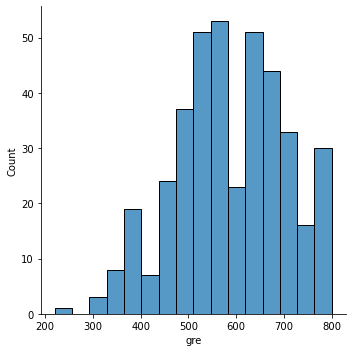

In [62]:
import seaborn
seaborn.displot(data=admission, x='gre')

precision and recall is often a tradeoff when we compare classifiers.